### Exploratory Data Analysis of Credit Card Fraud Detection

### 1. Data Overview Loading and Overview 

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# base_dir = os.getcwd()
data_path = os.path.join("..", "Data", "creditcard.csv")
# data_path = os.path.join(, "Data", "creditcard.csv")
# data_path = os.path.join(base_dir, 'Data','-', 'creditcard.csv')
output_path = os.path.join('..', 'Data', 'Cleaned_creditcard.csv')
# figure_path = os.path.join(base_dir, 'figures', 'balanced_distribution_new.png')



In [3]:
# # Handle potential encoding errors
try:
    transaction_df = pd.read_csv(data_path,encoding="utf-8") # read the data from from the path
except FileNotFoundError:
    print(f"Error: File not found at {data_path}. Check your working directory.")
    exit()
# try:
#     # We use a context manager (with) to ensure the file handle closes properly
#     # even if a crash happens later in the code
#     reader = pd.read_csv(data_path, encoding="utf-8", chunksize=1000)
    
#     # Let's just grab the first chunk to verify it works
#     first_chunk = next(reader)
#     print("Success! First 5 rows of the data:")
#     print(first_chunk.head())

# except FileNotFoundError:
#     print(f"Error: File not found at {os.path.abspath(data_path)}")
#     print("Check if the 'Data' folder and 'creditcard.csv' exist in the root directory.")
# except Exception as e:
#     print(f"An unexpected error occurred: {e}")

In [4]:
# import os
# print(os.getcwd())

### Data Inspection

In [5]:
# Data Inspection
print("Data Shape:", transaction_df.shape)

Data Shape: (284807, 31)


In [6]:
#first 3 rows
print("First 3 rows\n")
print(transaction_df.head(3))

First 3 rows

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  

[3 rows x 31 columns]


In [7]:
transaction_df.info()

<class 'pandas.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     284807 non-nu

In [8]:
transaction_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.384974e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.494498e-15,-5.620335e-16,1.149614e-16,-2.414189e-15,...,1.628620e-16,-3.576577e-16,2.618565e-16,4.473914e-15,5.109395e-16,1.686100e-15,-3.661401e-16,-1.227452e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## Discussion on Data Inspection
1. Dataset contains 284,807 transactions across 31 columns, a large dataset for training a ML model.
2. The Data has 28 PCA-transformed features (V1-v28)
- They were anonymized using PCA to protect sensitive user data like location or merchant details.
- The features V1 through V28 are the principal components.
- The features are typically ordered by importance. V1 captures the maximum variance in the original hidden data, with each subsequent feature (V2, V3, etc.) capturing progressively less.
- limits domain-based feature engineering but protects privacy
3. The dataset has 30 float64 columns and 1 int64 which is the Class column.


## Missing Values and Duplicates 

In [9]:
transaction_df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [10]:
# Duplicate check
duplicate_count = transaction_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 1081


## Intepretation
- The dataset has 1081 duplicates and zero null or missing values 
- The occurence of duplicates is very normal with financial Data 
- In Transaction data two rows with identical features genuinely represent two separate transactions. The same person could buy the same item twice within the same visit but not at the same time. 
- Removing the duplicates could discard real fraud data or legitimate events hurting model performance. 

## Class Distribution 
- Fraud Vrs Non-fraud Imbalance

In [11]:
# Class distribution counts
class_counts = transaction_df['Class'].value_counts()
class_pct = transaction_df['Class'].value_counts(normalize=True) * 100

print("Class Distribution (counts):")
print(class_counts)
print(f"\nLegitimate: {class_counts[0]:,} ({class_pct[0]:.3f}%)")
print(f"Fraud:      {class_counts[1]:,} ({class_pct[1]:.3f}%)")
print(f"\nImbalance ratio: {class_counts[0] / class_counts[1]:.0f}:1")

Class Distribution (counts):
Class
0    284315
1       492
Name: count, dtype: int64

Legitimate: 284,315 (99.827%)
Fraud:      492 (0.173%)

Imbalance ratio: 578:1


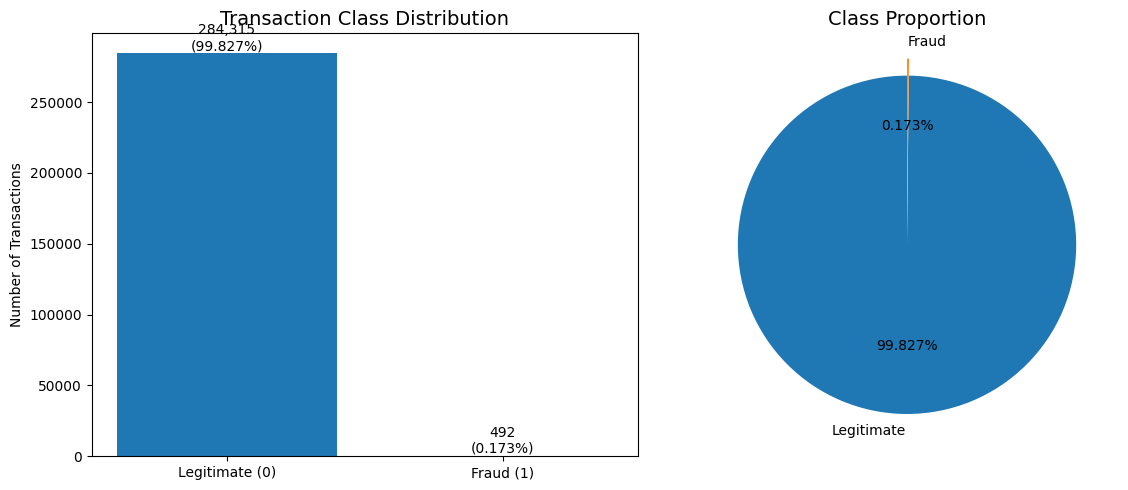

In [14]:
# Visualize class distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Bar chart
# colors = ['#2ecc71', '#e74c3c']
axes[0].bar(['Legitimate (0)', 'Fraud (1)'], class_counts.values, )
axes[0].set_title('Transaction Class Distribution', fontsize=14)
axes[0].set_ylabel('Number of Transactions')
for i, (count, pct) in enumerate(zip(class_counts.values, class_pct.values)):
    axes[0].text(i, count + 2000, f'{count:,}\n({pct:.3f}%)', ha='center', fontsize=10)

# Pie chart
axes[1].pie(class_counts.values, labels=['Legitimate', 'Fraud'], 
            autopct='%1.3f%%', startangle=90, explode=(0, 0.1))
axes[1].set_title('Class Proportion', fontsize=14)

plt.tight_layout()
plt.show()

## Intepretation
- This a clear case of class Imbalance 
- Techniques like SMOTE, undersampling will be critical to the model development stage
- Accuracy will be misleading in the model development stage, there needs to be resampling.

## Feature Distribution

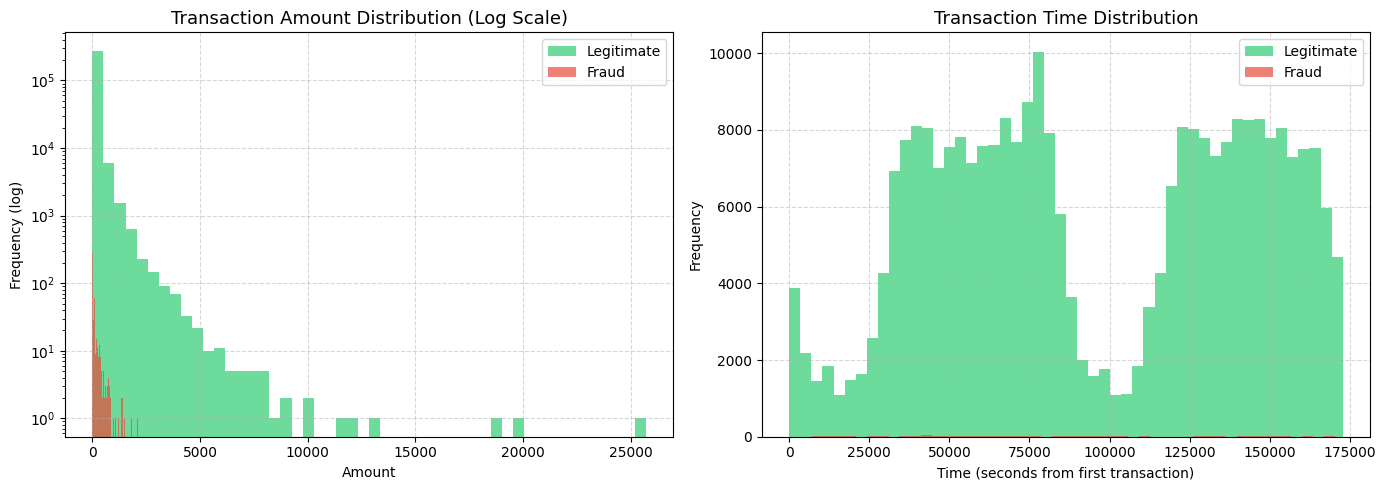

In [ ]:
# Distribution of Amount for Fraud vs Legitimate
# add grid to the plots

# fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# # Amount distribution
# fraud = transaction_df[transaction_df['Class'] == 1]
# legit = transaction_df[transaction_df['Class'] == 0]

# axes[0].hist(legit['Amount'], bins=50, alpha=0.7, label='Legitimate', color='#2ecc71', log=True)
# axes[0].hist(fraud['Amount'], bins=50, alpha=0.7, label='Fraud', color='#e74c3c', log=True)
# axes[0].set_title('Transaction Amount Distribution (Log Scale)', fontsize=13)
# axes[0].set_xlabel('Amount')
# axes[0].set_ylabel('Frequency (log)')
# axes[0].legend()
# axes[0].grid(True, linestyle='--', alpha=0.5)

# # Time distribution
# axes[1].hist(legit['Time'], bins=50, alpha=0.7, label='Legitimate', color='#2ecc71')
# axes[1].hist(fraud['Time'], bins=50, alpha=0.7, label='Fraud', color='#e74c3c')
# axes[1].set_title('Transaction Time Distribution', fontsize=13)
# axes[1].set_xlabel('Time (seconds from first transaction)')
# axes[1].set_ylabel('Frequency')
# axes[1].legend()
# axes[1].grid(True, linestyle='--', alpha=0.5)

# plt.tight_layout()
# plt.show()

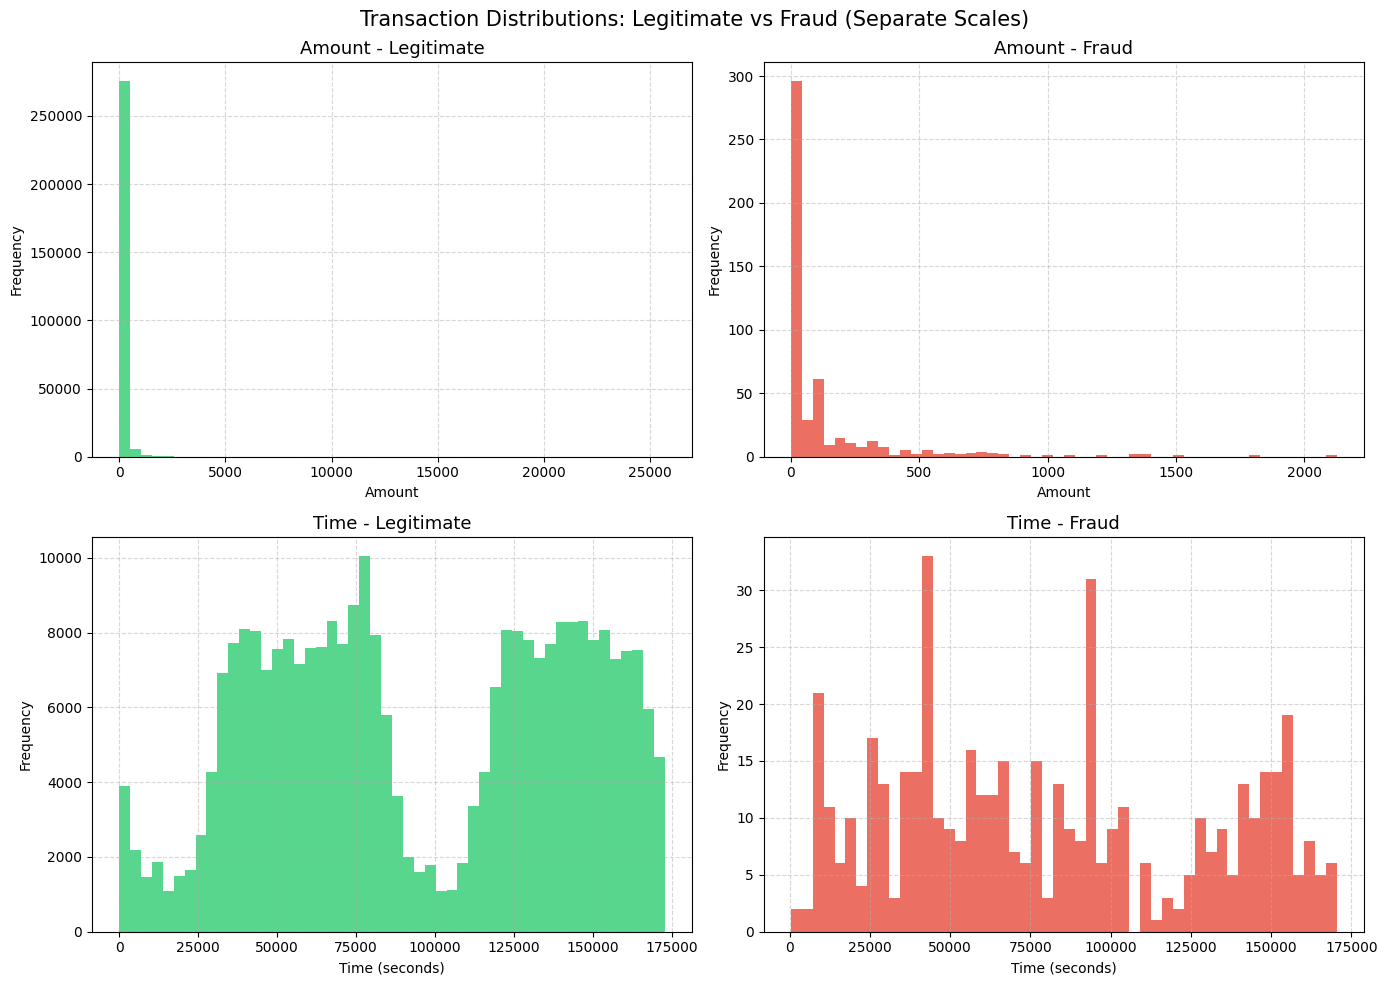

In [22]:
# Feature distributions - Fraud vs Legitimate (separate scales)
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Amount - Legitimate
axes[0, 0].hist(legit['Amount'], bins=50, color='#2ecc71', alpha=0.8)
axes[0, 0].set_title('Amount - Legitimate', fontsize=13)
axes[0, 0].set_xlabel('Amount')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].grid(True, linestyle='--', alpha=0.5)

# Amount - Fraud
axes[0, 1].hist(fraud['Amount'], bins=50, color='#e74c3c', alpha=0.8)
axes[0, 1].set_title('Amount - Fraud', fontsize=13)
axes[0, 1].set_xlabel('Amount')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].grid(True, linestyle='--', alpha=0.5)

# Time - Legitimate
axes[1, 0].hist(legit['Time'], bins=50, color='#2ecc71', alpha=0.8)
axes[1, 0].set_title('Time - Legitimate', fontsize=13)
axes[1, 0].set_xlabel('Time (seconds)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].grid(True, linestyle='--', alpha=0.5)

# Time - Fraud
axes[1, 1].hist(fraud['Time'], bins=50, color='#e74c3c', alpha=0.8)
axes[1, 1].set_title('Time - Fraud', fontsize=13)
axes[1, 1].set_xlabel('Time (seconds)')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].grid(True, linestyle='--', alpha=0.5)

plt.suptitle('Transaction Distributions: Legitimate vs Fraud (Separate Scales)', fontsize=15)
plt.tight_layout()
plt.show()

In [16]:
# Summary stats for Amount by Class
print("Amount Statistics - Legitimate Transactions:")
print(legit['Amount'].describe())
print(f"\nAmount Statistics - Fraudulent Transactions:")
print(fraud['Amount'].describe())

Amount Statistics - Legitimate Transactions:
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

Amount Statistics - Fraudulent Transactions:
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


### PCA Feature Distributions (V1–V28)

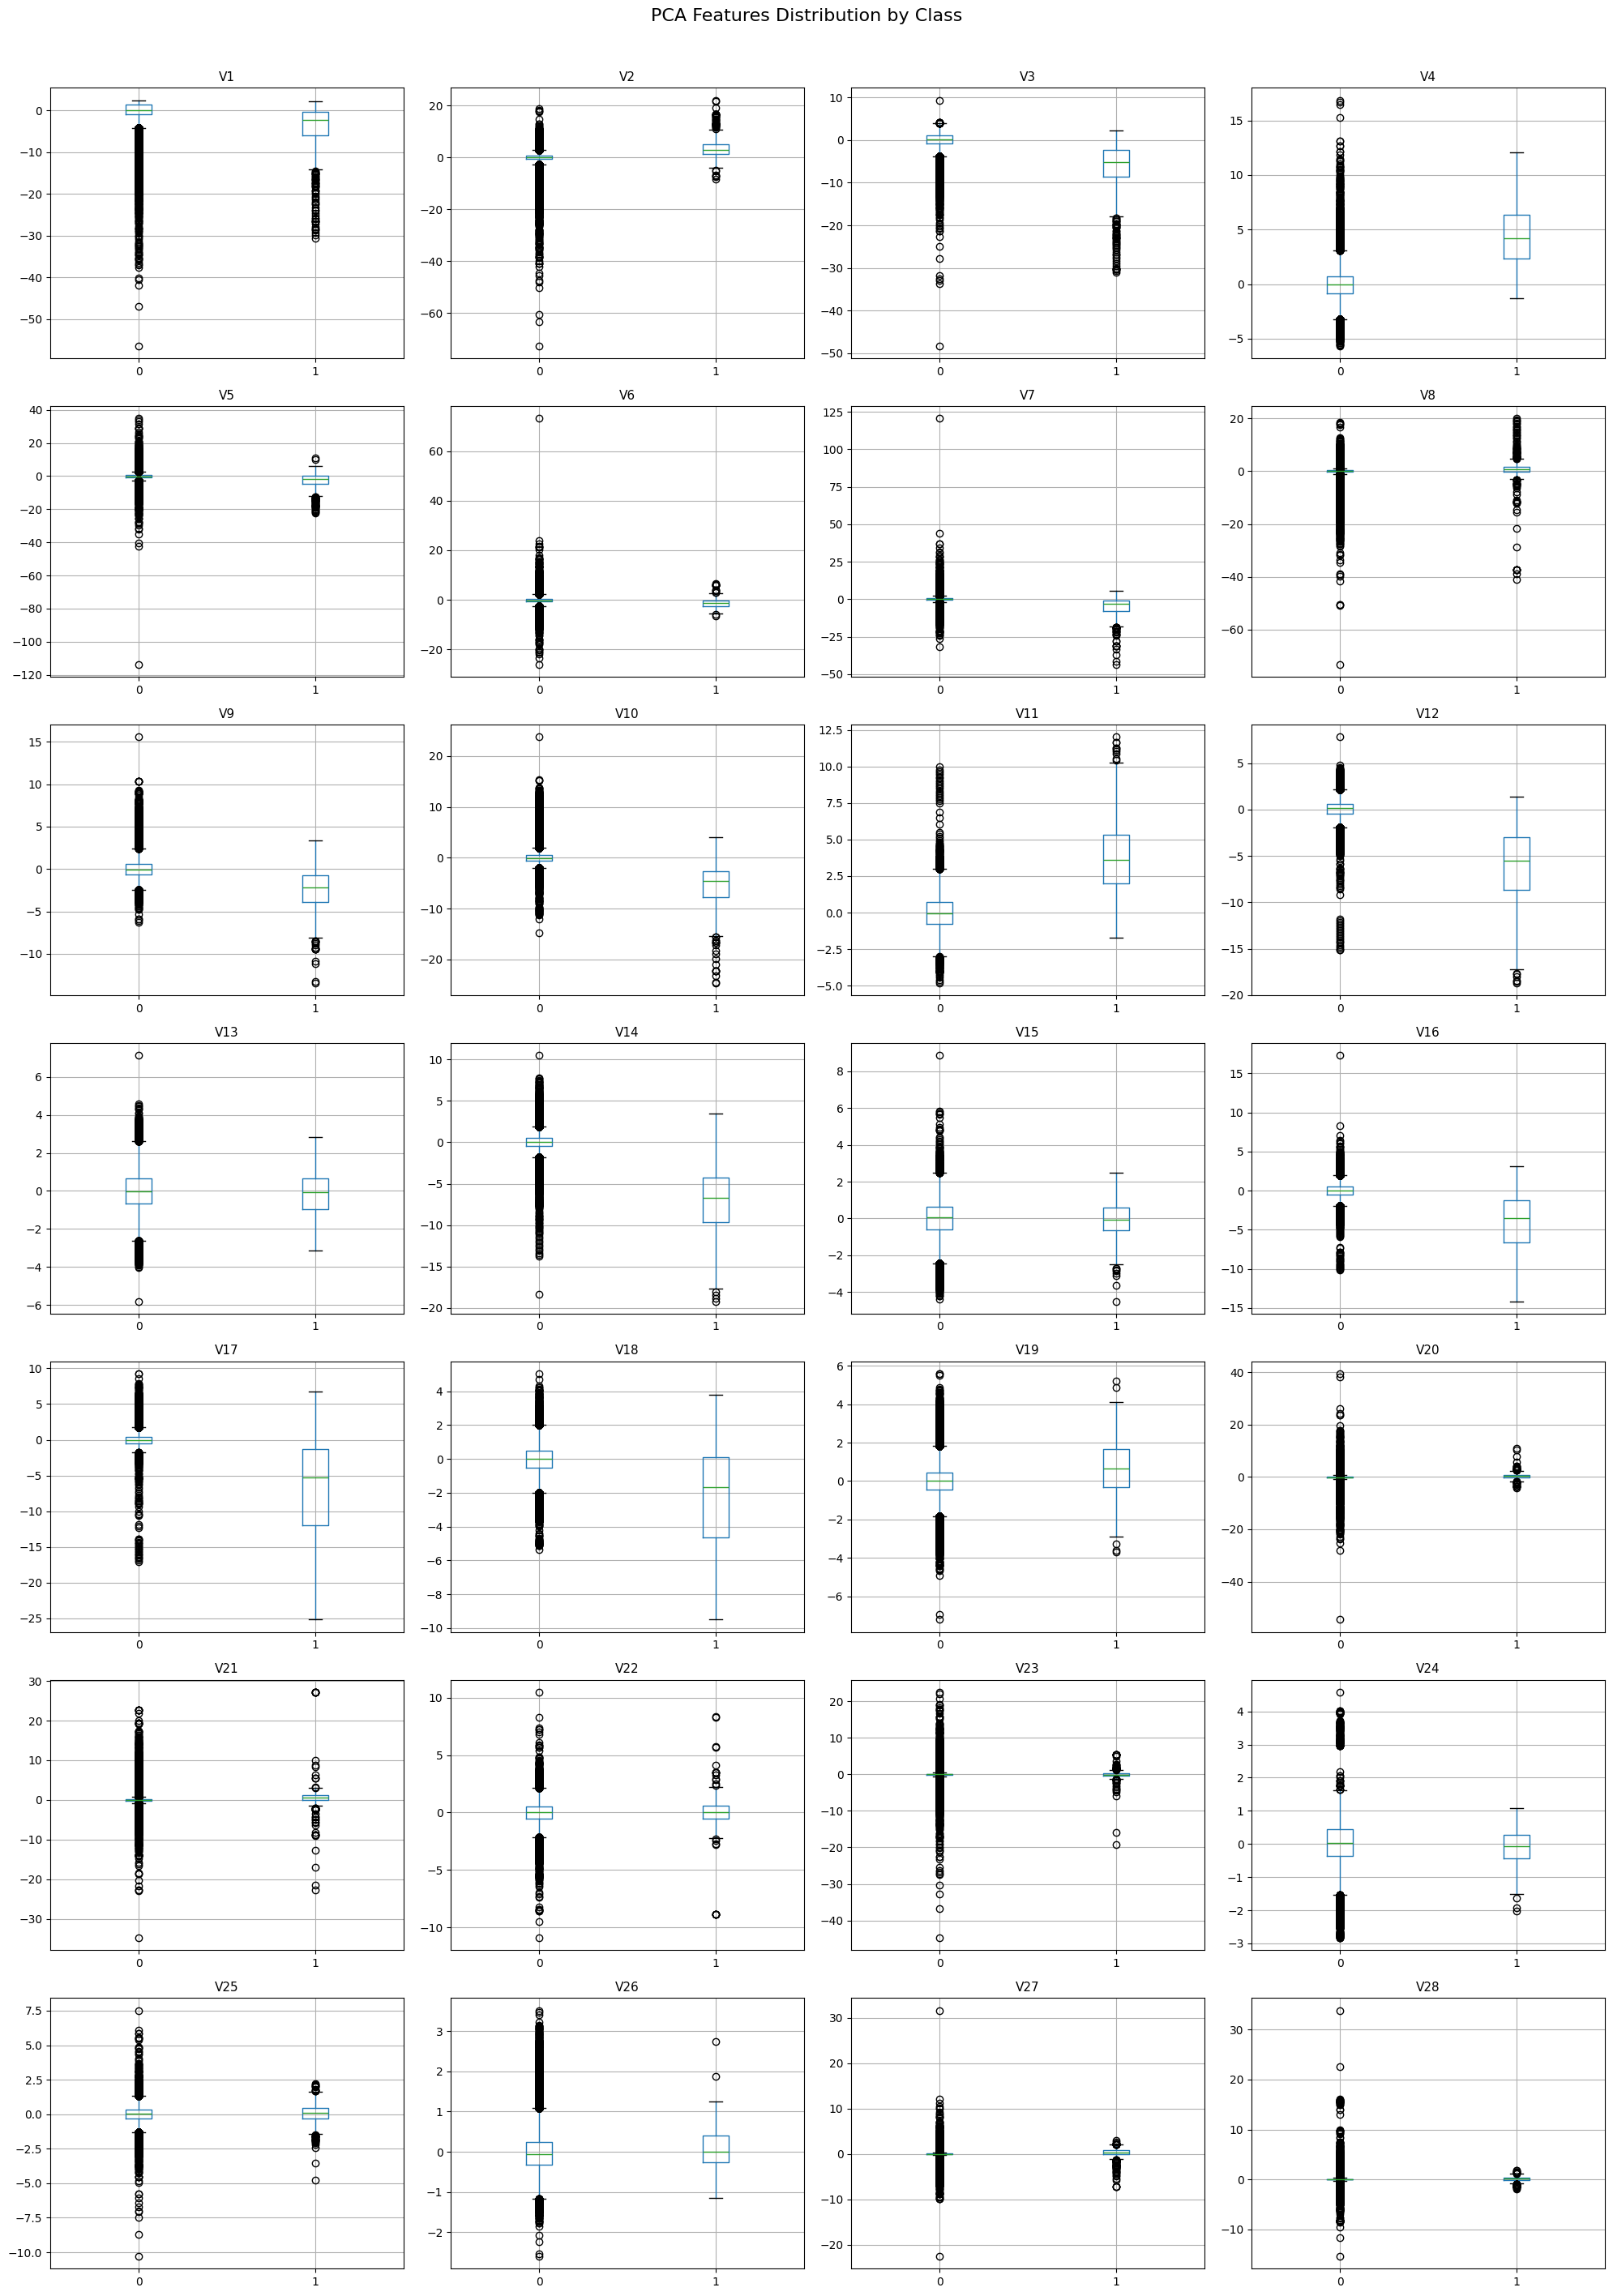

In [17]:
# Box plots of PCA features grouped by Class
pca_features = [f'V{i}' for i in range(1, 29)]

fig, axes = plt.subplots(7, 4, figsize=(20, 28))
axes = axes.flatten()

for i, col in enumerate(pca_features):
    transaction_df.boxplot(column=col, by='Class', ax=axes[i])
    axes[i].set_title(col, fontsize=11)
    axes[i].set_xlabel('')

plt.suptitle('PCA Features Distribution by Class', fontsize=16, y=1.01)
plt.tight_layout()
plt.show()

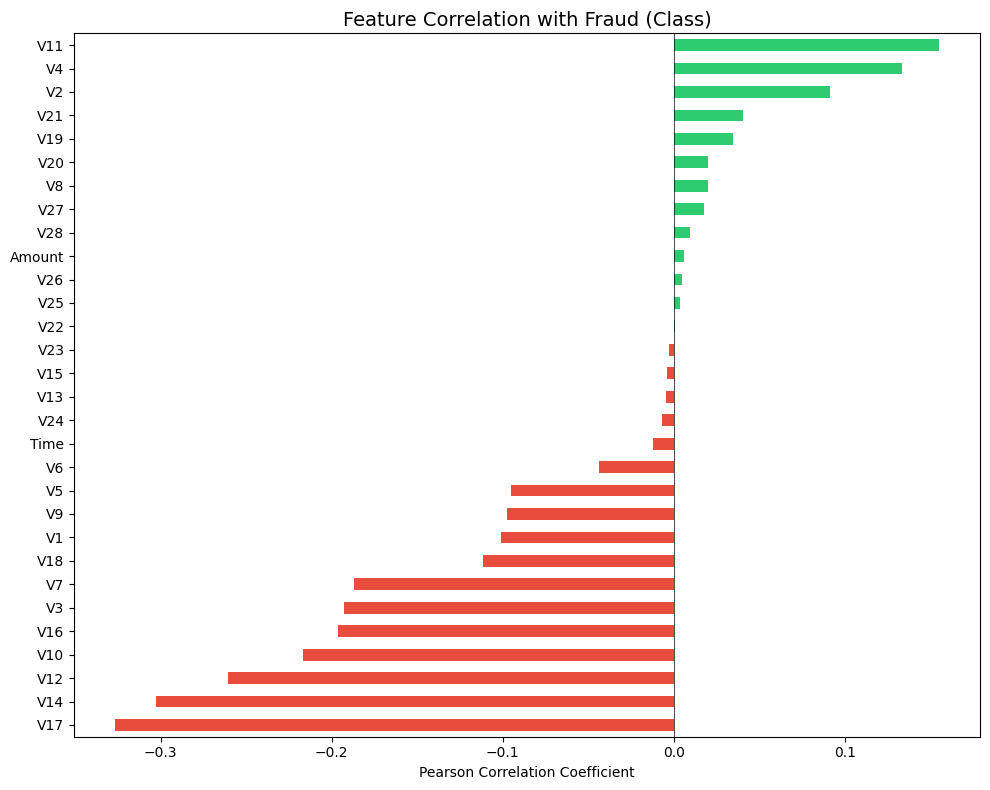

Top features positively correlated with fraud:
V19    0.034783
V21    0.040413
V2     0.091289
V4     0.133447
V11    0.154876
Name: Class, dtype: float64

Top features negatively correlated with fraud:
V17   -0.326481
V14   -0.302544
V12   -0.260593
V10   -0.216883
V16   -0.196539
Name: Class, dtype: float64


In [19]:
# Correlation of features with the target variable (Class)
correlations = transaction_df.corr()['Class'].drop('Class').sort_values()

fig, ax = plt.subplots(figsize=(10, 8))
correlations.plot(kind='barh', color=correlations.map(lambda x: '#e74c3c' if x < 0 else '#2ecc71'), ax=ax)
ax.set_title('Feature Correlation with Fraud (Class)', fontsize=14)
ax.set_xlabel('Pearson Correlation Coefficient')
ax.axvline(x=0, color='black', linewidth=0.5)
plt.tight_layout()
plt.show()

# Print top positive and negative correlations
print("Top features positively correlated with fraud:")
print(correlations.tail(5))
print("\nTop features negatively correlated with fraud:")
print(correlations.head(5))

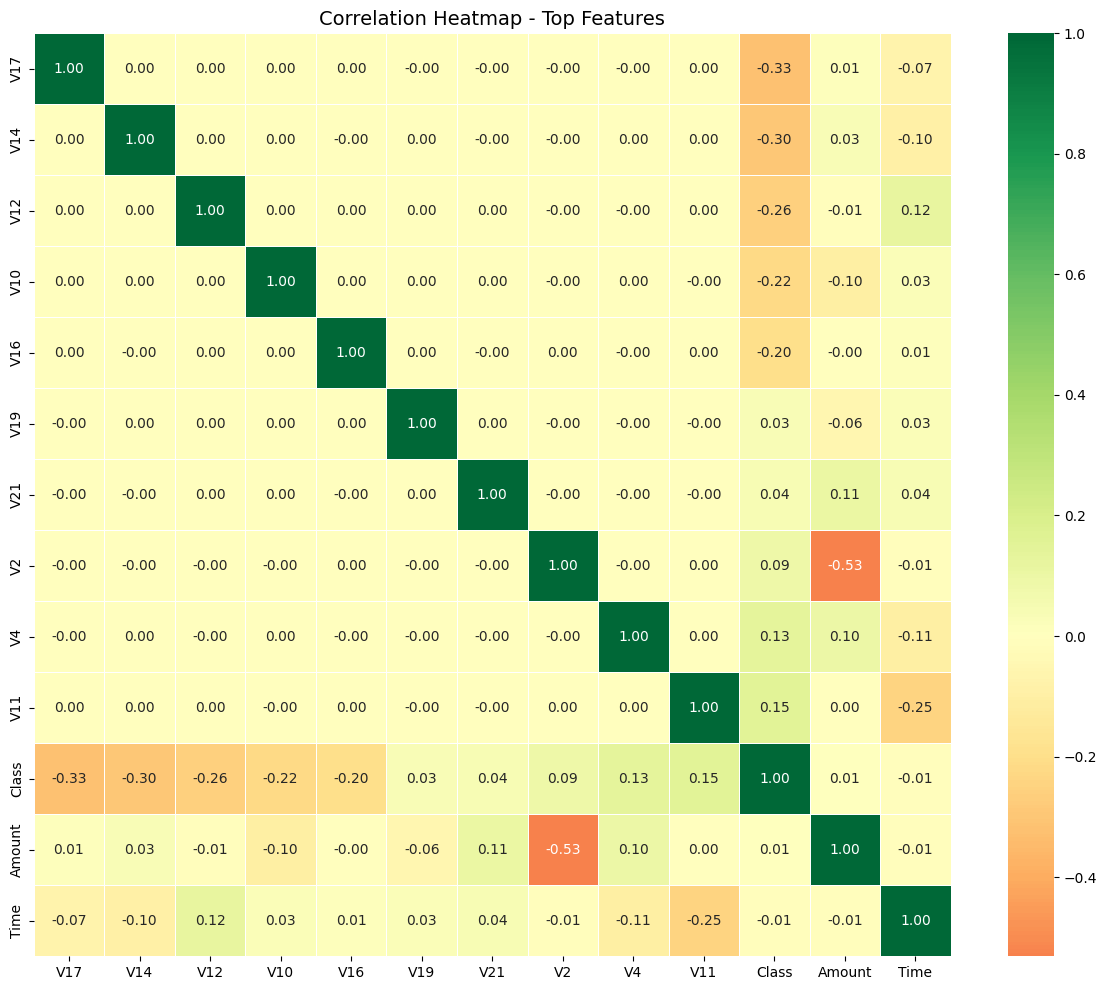

In [20]:
# Heatmap of top correlated features
top_features = list(correlations.head(5).index) + list(correlations.tail(5).index) + ['Class', 'Amount', 'Time']
plt.figure(figsize=(12, 10))
sns.heatmap(transaction_df[top_features].corr(), annot=True, fmt='.2f', cmap='RdYlGn', center=0, linewidths=0.5)
plt.title('Correlation Heatmap - Top Features', fontsize=14)
plt.tight_layout()
plt.show()

### Interpretation: Feature Distributions

**Amount:**
- Both legitimate and fraud transactions are heavily right-skewed — the vast majority are small amounts
- Legitimate transactions range up to ~$25,691 while fraud caps at ~$2,126
- Fraud transactions concentrate even more heavily at very low amounts (under $100), with ~300 transactions under ~$50. This suggests fraudsters test with small "probe" charges before attempting larger ones
- The median fraud amount ($9.25) is less than half the legitimate median ($22.00)

**Time:**
- Legitimate transactions show a clear cyclical pattern with two peaks — likely corresponding to two days of daytime activity, with dips during nighttime (~25,000s and ~100,000s)
- Fraud transactions are more uniformly distributed but show two notable spikes around ~30,000s and ~100,000s, roughly aligning with mid-day periods
- Fraud does not appear to concentrate during off-peak hours, suggesting timing alone is not a strong fraud indicator

**PCA Features (V1–V28):**
- Features with the clearest class separation in the boxplots: V14, V12, V10, V17 (fraud shifts negative) and V11, V4 (fraud shifts positive) — consistent with the correlation analysis
- Features like V22, V25, V26, V28 show nearly identical distributions for both classes — minimal discriminative value

### Interpretation: Correlation Analysis

- **Strongest negative correlations with fraud:** V17 (-0.33), V14 (-0.30), V12 (-0.26), V10 (-0.22), V16 (-0.20) — when these features decrease, fraud likelihood increases
- **Strongest positive correlations:** V11 (+0.15), V4 (+0.13), V2 (+0.09)
- **Amount and Time have near-zero correlation** with Class (0.01 and -0.01) — they are poor standalone linear predictors
- **The heatmap confirms PCA features are nearly uncorrelated with each other** (values near 0.00) — this is expected since PCA produces orthogonal components. Each feature carries unique information
- **Notable exception:** V2 and Amount show a moderate correlation of -0.53, meaning higher-amount transactions tend to have lower V2 values

## 6. Outlier Detection

In [23]:
# Outlier detection using IQR method on Amount and top correlated PCA features
def count_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = series[(series < lower) | (series > upper)]
    return len(outliers), lower, upper

key_features = ['Amount', 'V17', 'V14', 'V12', 'V10', 'V11', 'V4']

print(f"{'Feature':<10} {'Outliers':>10} {'% of Total':>12} {'Lower Bound':>14} {'Upper Bound':>14}")
print("-" * 62)
for feat in key_features:
    n_outliers, lower, upper = count_outliers_iqr(transaction_df[feat])
    pct = n_outliers / len(transaction_df) * 100
    print(f"{feat:<10} {n_outliers:>10,} {pct:>11.2f}% {lower:>14.2f} {upper:>14.2f}")

Feature      Outliers   % of Total    Lower Bound    Upper Bound
--------------------------------------------------------------
Amount         31,904       11.20%        -101.75         184.51
V17             7,420        2.61%          -1.81           1.72
V14            14,149        4.97%          -1.80           1.87
V12            15,348        5.39%          -1.94           2.15
V10             9,496        3.33%          -2.02           1.94
V11               780        0.27%          -3.02           2.99
V4             11,148        3.91%          -3.24           3.13


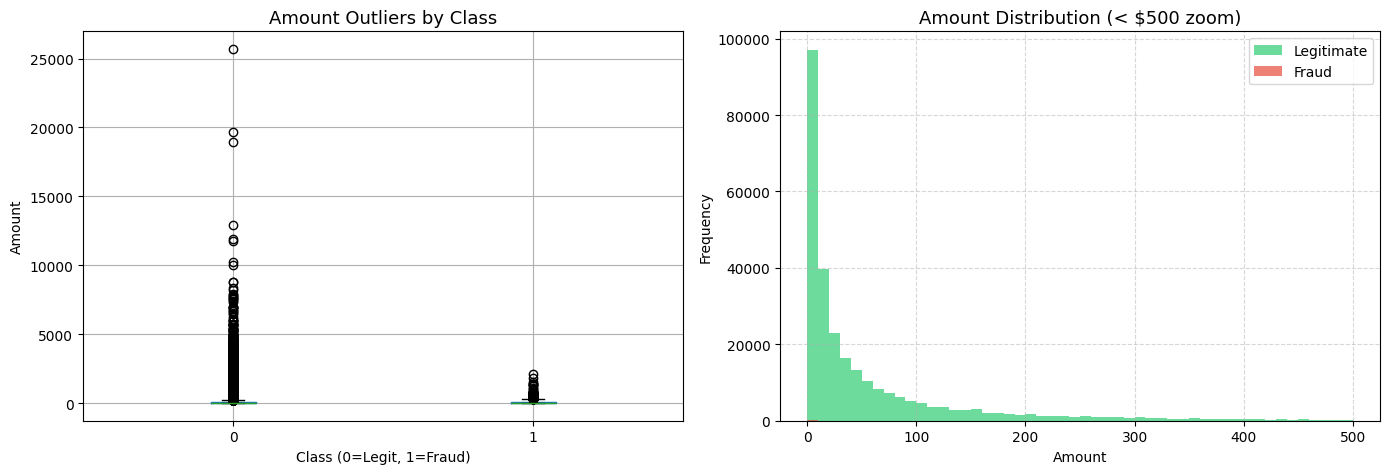

In [24]:
# Visualize outliers for Amount
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Amount boxplot by class
transaction_df.boxplot(column='Amount', by='Class', ax=axes[0])
axes[0].set_title('Amount Outliers by Class', fontsize=13)
axes[0].set_xlabel('Class (0=Legit, 1=Fraud)')
axes[0].set_ylabel('Amount')

# Amount distribution zoomed in (under $500)
axes[1].hist(legit[legit['Amount'] < 500]['Amount'], bins=50, alpha=0.7, label='Legitimate', color='#2ecc71')
axes[1].hist(fraud[fraud['Amount'] < 500]['Amount'], bins=50, alpha=0.7, label='Fraud', color='#e74c3c')
axes[1].set_title('Amount Distribution (< $500 zoom)', fontsize=13)
axes[1].set_xlabel('Amount')
axes[1].set_ylabel('Frequency')
axes[1].legend()
axes[1].grid(True, linestyle='--', alpha=0.5)

plt.suptitle('')
plt.tight_layout()
plt.show()

## 7. EDA Summary & Key Insights

**Dataset:** 284,807 credit card transactions with 31 features (Time, V1-V28, Amount, Class)

**Data Quality:**
- Zero missing values across all features
- 1,081 duplicate rows retained (valid for transaction data)

**Class Imbalance:**
- Only 492 fraud cases (0.173%) vs 284,315 legitimate (99.827%)
- Imbalance ratio of ~577:1 — requires resampling techniques (SMOTE, undersampling) or class weights during modeling
- Accuracy is an unreliable metric; use precision, recall, F1-score, and AUC-PR instead

**Feature Insights:**
- V17, V14, V12, V10, V16 are the strongest negative fraud indicators
- V11, V4, V2 are the strongest positive fraud indicators
- Amount and Time have negligible linear correlation with fraud
- Fraud transactions tend to be smaller amounts (median $9.25 vs $22.00)
- PCA features are orthogonal — no multicollinearity concerns

**Outliers:**
- Significant outliers exist in Amount and several PCA features
- These are expected in financial data and should not be removed without careful consideration


In [25]:
# Save cleaned data
transaction_df.to_csv(output_path, index=False)
print(f"Cleaned data saved to: {output_path}")
print(f"Shape: {transaction_df.shape}")

Cleaned data saved to: ..\Data\Cleaned_creditcard.csv
Shape: (284807, 31)
